- The objective of this machine learning project is to predict the selling price of a used car based on various features related to the car, such as its make, model, year of manufacture, mileage, engine capacity, and more. By building a predictive model, you can estimate a car's market value, helping sellers price their cars accurately and buyers to determine if a car is fairly priced.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("Cardetails.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.shape   # 8128 sample and 13 features in a dataset.

(8128, 13)



- **name**: The model or brand name of the car.
- **year**: The year the car was manufactured.
- **selling_price**: The price at which the car is being sold (target variable).
- **km_driven**: The total distance the car has been driven in kilometers.
- **fuel**: The type of fuel used by the car (e.g., Petrol, Diesel).
- **seller_type**: The type of seller (e.g., individual, dealer).
- **transmission**: The type of transmission (e.g., Manual, Automatic).
- **owner**: The number of previous owners of the car.
- **mileage**: The fuel efficiency of the car (distance traveled per unit of fuel).
- **engine**: The engine capacity of the car (usually in cubic centimeters, cc).
- **max_power**: The maximum power output of the car's engine.
- **torque**: The rotational force produced by the car's engine.
- **seats**: The number of seats available in the car.

These features are used to predict the **selling_price** of a car.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Features .
- **Numerical** = year , selling_price , km_driven  

- **Categorical** = name , fuel , seller_type  , fuel , seller_type , transmission , owner , seats

- **Mix** = engine , max_power , torque ,mileage


In [8]:
def graphs(data):
  """Plots a histogram and boxplot of the data side-by-side."""

  # Create a subplot grid
  fig, axes = plt.subplots(1, 2, figsize=(5, 3))

  # Plot the histogram
  sns.histplot(data, kde=True, ax=axes[0])
  axes[0].set_title("Histogram")

  # Plot the boxplot
  sns.boxplot(data, ax=axes[1])
  axes[1].set_title("Boxplot")

  # Adjust layout
  plt.tight_layout()
  plt.show()


# Univariate analysis.

# year

- **Insights**
- According to histogram the data was left skeweed it means the most of the vehicles are around 2010 to 2020.- 
boxplot shows outliers it means some vehicles are older manufactured before 2000.


- **Preprocessing*
  
- the data was left skeweed with the skeweeness of (-1.0722928936160485) we need to transform this feature .
- we can also remove outliers from data.*

In [9]:
df['year'].describe()

count    8128.000000
mean     2013.804011
std         4.044249
min      1983.000000
25%      2011.000000
50%      2015.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [10]:
df['year'].isnull().sum()   # no null values are present .

0

In [11]:
df['year'].skew()

-1.0722928936160485

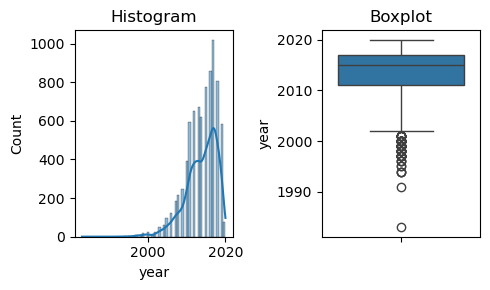

In [12]:
graphs(df['year'])

- According to histogram the data was left skeweed it means the most of the vehicles are around 2010 to 2020.
- boxplot shows outliers it means some vehicles are older manufactured before 2000.

# selling_price

- **Insights**
- According the histogram data shows a right skeweed distribution it means the mostlly car prices distributed towards lower prices.
According to the boxplot it shows majors outliers.


- **Preprocessing*
- This feature shows a right skeweed with then skeweeness of (4.19) we need to transfor this feature.
- we need to remove outliers *

In [13]:
df['selling_price'].describe()     # the average selling price of cars is 638271.80.

count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [14]:
df['selling_price'].isnull().sum()      # no null values are present .

0

In [15]:
df['selling_price'].skew()

4.193533440675855

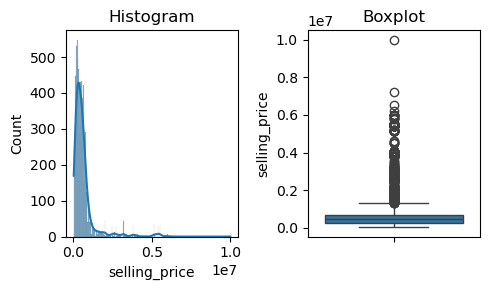

In [16]:
graphs(df['selling_price'])

- According the histogram data shows a right skeweed distribution it means the mostlly data concentrated towards lower prices.
- According to the boxplot it shows majors outliers. 

# km_driven

- **Insights**
-  According to histogram it shows a highlly right skweed data it means most of the cars are less driven under 1 lakh kilometer.
- shows a major outliers.


- **Preprocessing**
- the data was highlly right skweed with the skeweeness of 11.17 we need to transform this feature.
- we can also remove the outliers.

In [17]:
df['km_driven'].describe()    # The average of km_driven of all car is 69819 km 
                              # the less driven car just 1 km.
                             # the maximum driven car is 23lakhn + .

count    8.128000e+03
mean     6.981951e+04
std      5.655055e+04
min      1.000000e+00
25%      3.500000e+04
50%      6.000000e+04
75%      9.800000e+04
max      2.360457e+06
Name: km_driven, dtype: float64

In [18]:
df['km_driven'].isnull().sum()   # no null values are present.

0

In [19]:
df['km_driven'].skew()

11.170909783549087

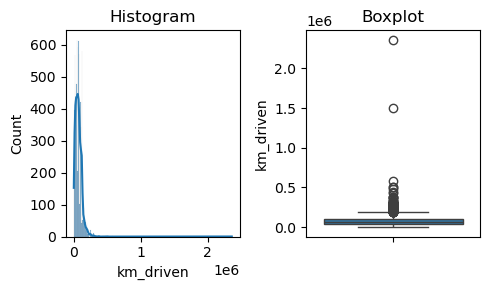

In [20]:
graphs(df['km_driven'])

- According to histogram it shows a highlly right skweed data it means most of the cars are less driven under 1 lakh kilometer.
- shows a major outliers.

# Preprocessing on above  features 

# import pandas as pd
import numpy as np

def remove_outliers_iqr(df, columns, factor=1.5):
  """Removes outliers using the IQR method.

  Args:
    df: The DataFrame containing the data.
    columns: A list of column names to check for outliers.
    factor: A factor to multiply the IQR by (default: 1.5).

  Returns:
    A new DataFrame without outliers.
  """

  df_copy = df.copy()

  for col in columns:
    q1 = df_copy[col].quantile(0.25)
    q3 = df_copy[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr

    df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]

  return df_copy

# Assuming your DataFrame is named 'df' and you want to remove outliers from columns 'feature1', 'feature2', and 'feature3':
df_cleaned = remove_outliers_iqr(df, ['feature1', 'feature2', 'feature3'])

# Convert the mix columns into numerical column.

# engine

- **Insights**
- it shows a slightlly right skweed data it means most of the engines are lower side.
- it shows outliers.



- **Preprocessing**
- we nees to remove some outliers.



In [21]:
df['engine'].isnull().sum()   # there are 221 nan values.

221

In [22]:
df['engine'] = df['engine'].str.replace("CC","").str.replace(',','')   # remove the cc part from engine column. 

In [23]:
df['engine']   # now cc part was remove .

0       1248 
1       1498 
2       1497 
3       1396 
4       1298 
        ...  
8123    1197 
8124    1493 
8125    1248 
8126    1396 
8127    1396 
Name: engine, Length: 8128, dtype: object

In [24]:
 df['engine'] = pd.to_numeric(df['engine'])   # now convert object into numeric.

In [25]:
median = df['engine'].median()
df['engine'] = df['engine'].fillna(median)   # then fill nan value with median because it is a descreate feature.

In [26]:
df['engine'].isnull().sum()   # Now all null values are reomove

0

In [27]:
df['engine'].skew()

1.1753055440141613

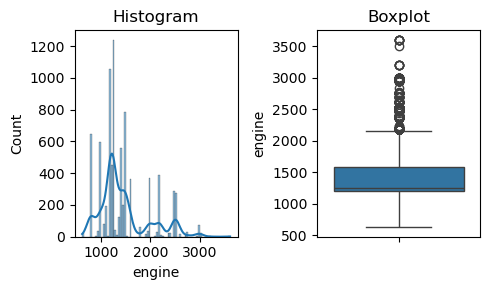

In [28]:
graphs(df['engine'])

- it shows a slightlly right skweed data it means most of the engines are lower side.
- it shows outliers.

# max_power.

- **Insights**
-  Histogram shows a right skweed data with skeweness of 1.65 it means most of the data concenytrated to left it means most of the data have a bhp in lower side and some car have a higher bhp
- boxplot shows a major outliers.

- **preprocesing**
- we need to remove outliers and aplly transformation .

In [29]:
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [30]:
# 1 .Step :Romove  non-numeric parts of the max_power.
df['max_power'] = df['max_power'].str.replace(' bhp','').str.replace(',','')

In [31]:
df['max_power'].head()  # Now reomove the bhp.

0        74
1    103.52
2        78
3        90
4      88.2
Name: max_power, dtype: object

In [32]:
# 2 Step :Now convert the max_power into numeric .
df['max_power'] = pd.to_numeric(df['max_power'])

In [33]:
# 3 . Step : fill nan values from median.
median_values = df['max_power'].median()
df['max_power' ] = df['max_power'].fillna(median_values)

In [34]:
df['max_power'].isnull().sum()  # now null values are remove.

0

In [35]:
df['max_power'].skew()

1.6595575154307947

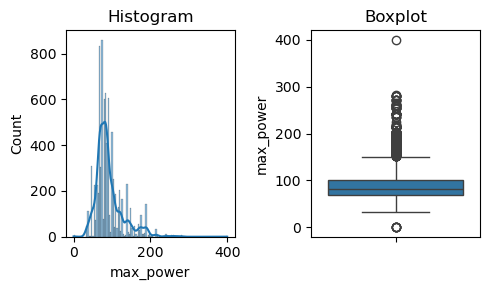

In [36]:
graphs(df['max_power'])

- Histogram shows a right skweed data with skeweness of 1.65 it means most of the data concenytrated to left it means most of the data have a bhp in lower side and some car have a higher bhp
- boxplot shows a major outliers.

# mileage.

- **Insights**
- According to histogram it shows a almost normaly distributed it means most of the cars have the average of around 19 .
- Boxplot shows some outliers.

- **Preprocessing**
- we need to remove outliers.

In [37]:
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [38]:
df['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [39]:
# remove kmpl or km/kg from the mileage.
df['mileage'] = df['mileage'].str.replace( ' kmpl','').str.replace(' km/kg','')

In [40]:
df['mileage']

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: mileage, Length: 8128, dtype: object

In [41]:
# now convert to numeric.
df['mileage'] = pd.to_numeric(df['mileage'],errors='coerce')

In [42]:
# fill the nan value with the median.
median_value = df['mileage'].median()
df['mileage'] = df['mileage'].fillna(median_value)

In [43]:
df['mileage'].isnull().sum()

0

In [44]:
df['mileage'].describe()

count    8128.000000
mean       19.415554
std         3.981922
min         0.000000
25%        16.800000
50%        19.300000
75%        22.277500
max        42.000000
Name: mileage, dtype: float64

In [45]:
df['mileage'].skew()

-0.14220847114521287

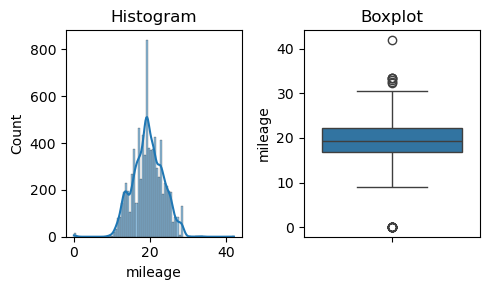

In [46]:
graphs(df['mileage'])

- According to histogram it shows a almost normaly distributed it means most of the cars have the average of around 19 .
- Boxplot shows some outliers.

In [47]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


# torque

- **Insights**



- **Preprocessing**

In [48]:
df['torque'].head(10)

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
5           113.75nm@ 4000rpm
6        7.8@ 4,500(kgm@ rpm)
7               59Nm@ 2500rpm
8         170Nm@ 1800-2400rpm
9              160Nm@ 2000rpm
Name: torque, dtype: object

In [49]:
import re
# Function to extract and engineer features from the 'torque' column
def split_torque_and_rpm(value):
    if isinstance(value, str):  # Check if the value is a string
        # Extract all numeric parts
        numeric_values = re.findall(r'\d+\.?\d*', value)
        
        if not numeric_values:
            return None, None
        
        # Extract torque value
        torque_value = float(numeric_values[0])
        
        # Convert kgm to Nm if needed
        if 'kgm' in value:
            torque_value *= 9.80665  # 1 kgm = 9.80665 Nm
        
        # Extract and process RPM
        rpm_value = None
        if 'rpm' in value:
            # If RPM is a range (e.g., "1500-2500rpm"), take the average
            if '-' in value:
                rpm_values = list(map(float, numeric_values[1:]))
                rpm_value = sum(rpm_values) / len(rpm_values)
            else:
                rpm_value = float(numeric_values[-1])
        
        return torque_value, rpm_value
    else:
        return None, None  # Return None if the value is not a string

# Apply feature engineering to create new columns
df['torque_value'], df['rpm_value'] = zip(*df['torque'].apply(split_torque_and_rpm))

# Drop the original 'torque' column if you no longer need it
df.drop(columns=['torque'], inplace=True)

# Display the resulting DataFrame
print(df)


                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage  e

In [50]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.000000,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,124.544455,700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.668960,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.776475,500.0


# torque_value 

- **Insights**
-  according to histogram it shows a hihlly right skweed distribution it means most of the cars are in low torque genarate.
- boxplot shows some outliers.

- **Preprocessing**
- we need to remove the outliers and transform also.

In [51]:
df['torque_value'].describe()    # average torque of cars is 180.70

count    7906.000000
mean      180.708777
std       116.442315
min        14.900000
25%       111.795810
50%       170.000000
75%       209.000000
max      3726.527000
Name: torque_value, dtype: float64

In [52]:
df['torque_value'].skew()    # highlly right skweed.

6.93887015818159

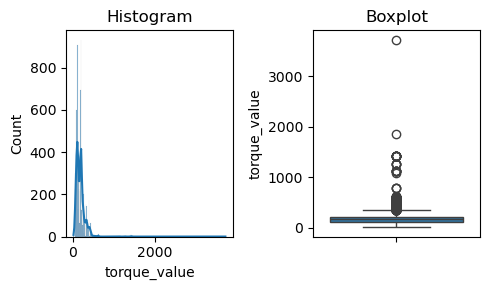

In [53]:
graphs(df['torque_value'])

- according to histogram it shows a hihlly right skweed distribution it means most of the cars are in low torque genarate.
- boxplot shows some outliers.

In [54]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.000000,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,124.544455,700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.668960,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.776475,500.0


# rpm_value.

- **Insights**

- **Preprocessing**

In [55]:
df['rpm_value'].describe()

count    7842.000000
mean     2773.438738
std      1085.265551
min         0.000000
25%      2000.000000
50%      2375.000000
75%      4000.000000
max      5000.000000
Name: rpm_value, dtype: float64

In [56]:
df['rpm_value'].isnull().sum()                                                                                                                                                                                                                                                                                                                                                                                         

286

In [57]:
mean_rpm = df['rpm_value'].median()
mean_rpm

2375.0

In [58]:
df['rpm_value']= df['rpm_value'].fillna(mean_rpm)

In [59]:
df['rpm_value'].isnull().sum()

0

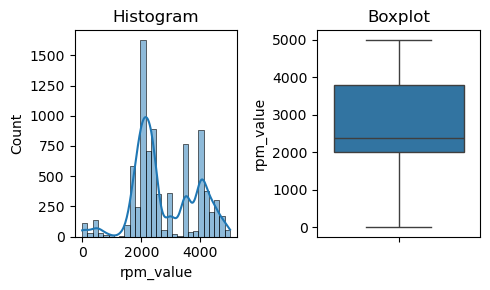

In [60]:
graphs(df['rpm_value'])

# name

- **Insights**
- we can decided to split the name feature in 2 new feature called manufacturer and model for better analysis.

In [61]:
df['name'].value_counts()    

name
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: count, Length: 2058, dtype: int64

In [62]:

# Split the name into manufacturer and model.
df['manufacturer'] = df['name'].apply(lambda x: x.split()[0])
df['model'] = df['name'].apply(lambda x: ' '.join(x.split()[1:]))



df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value,manufacturer,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.000000,2000.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.000000,2000.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,124.544455,700.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.668960,2250.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.776475,500.0,Maruti,Swift VXI BSIII


In [63]:
df.drop(columns=['name'])

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value,manufacturer,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.000000,2000.00,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.000000,2000.00,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,124.544455,700.00,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.668960,2250.00,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.776475,500.00,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,113.700000,4000.00,Hyundai,i20 Magna
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,235.359600,413.25,Hyundai,Verna CRDi SX
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,190.000000,2000.00,Maruti,Swift Dzire ZDi
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,140.000000,2400.00,Tata,Indigo CR4


# Manufacturer.

- **Insights**
- Maruti have the highest number of re selling in cars.

In [64]:
manufacturer = df['manufacturer'].value_counts() 
manufacturer

manufacturer
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

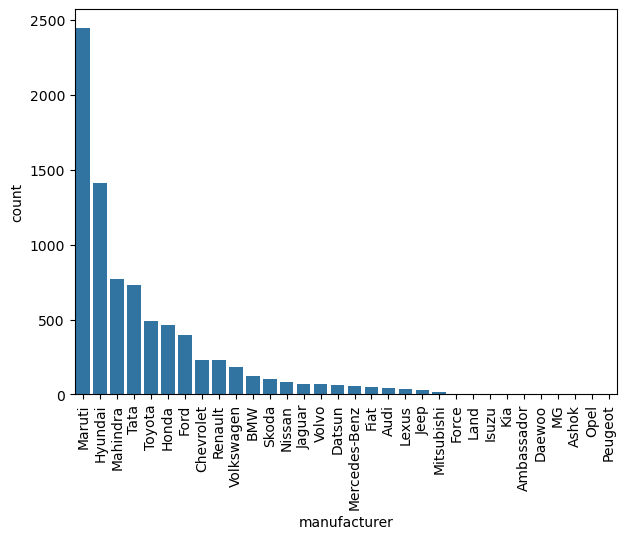

In [65]:
plt.figure(figsize=(7,5))
sns.barplot(manufacturer)
plt.xticks(rotation=90)
plt.show()

-  Maruti have the highest number of re selling in cars.

# model

- **Insights**
- highest car in re seeling in Swift Dzire VDI.

In [66]:
df['model'].value_counts()   # highest car in re seeling in Swift Dzire VDI.

model
Swift Dzire VDI                           129
Alto 800 LXI                               82
Alto LXi                                   71
X4 M Sport X xDrive20d                     62
Swift VDI                                  61
                                         ... 
Fabia 1.4 TDI Ambiente                      1
Scorpio VLX 2WD AT BSIII                    1
KWID Climber 1.0 AMT                        1
XUV300 W8 Option Dual Tone Diesel BSIV      1
Innova 2.5 GX (Diesel) 8 Seater BS IV       1
Name: count, Length: 2058, dtype: int64

# fuel

- **Insights**
-  MOst of the cars are diesel cars more than 54 % and 44.7 % are petrol cars.

In [67]:
fuel_count = df['fuel'].value_counts()
fuel_count

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

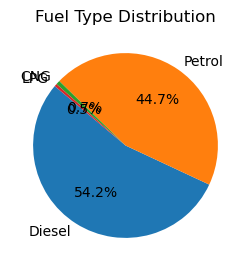

In [68]:
# Data for the pie chart
fuel_data = {
    'Diesel': 4402,
    'Petrol': 3631,
    'CNG': 57,
    'LPG': 38
}

# Create labels and values for the pie chart
labels = list(fuel_data.keys())
sizes = list(fuel_data.values())

# Plotting the pie chart
plt.figure(figsize=(5, 3))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Fuel Type Distribution')

# Show the pie chart
plt.show()


- MOst of the cars are diesel cars more than 54 % and 44.7 % are petrol cars.

# seller_type

- **Insights**
- more than 83.2% cars are sale by Individuals.

In [69]:
df['seller_type'].value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

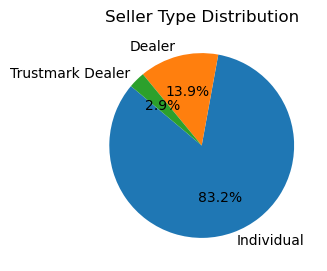

In [70]:
# Data for the pie chart from value counts
seller_type_data = {
    'Individual': 6766,
    'Dealer': 1126,
    'Trustmark Dealer': 236
}

# Create labels and values for the pie chart
labels = list(seller_type_data.keys())
sizes = list(seller_type_data.values())

# Plotting the pie chart
plt.figure(figsize=(5, 3))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Seller Type Distribution')

# Show the pie chart
plt.show()


- more than 83.2% cars are sale by Individuals.

# transmission

- **Insights**
-  87.08 % cars are Manual.


In [71]:
transmission_count = df['transmission'].value_counts()
transmission_count

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [72]:
count = [7078,1050]
label = ['Manual','Automatic']

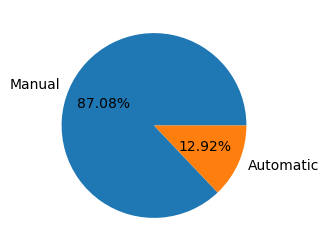

In [73]:
plt.figure(figsize=(5,3))
plt.pie(count,labels=label,autopct = "%1.2f%%")
plt.show()

- 87.08 % cars are Manual.

In [74]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value,manufacturer,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,190.0,2000.0,Maruti,Swift Dzire VDI


# owner

- **Insights**
- Most of the cars are First owner cars  65.07 %


In [75]:
owner_count = df['owner'].value_counts()
owner_count

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [76]:
count = [5289,2105,555,174,5]
label = ['First Owner','Second Owner','Third Owner','Fourth & Above Owner','Test Drive Car']

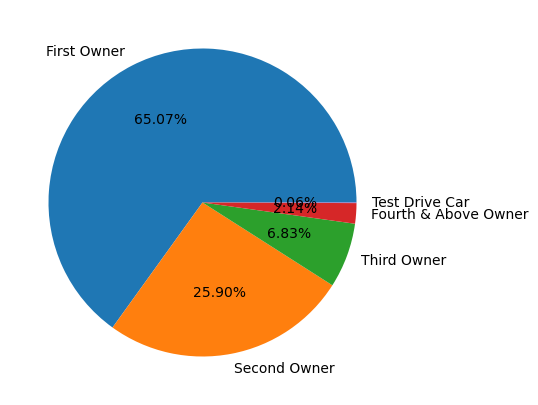

In [77]:
plt.figure(figsize=(5,5))
plt.pie(count,labels=label,autopct = "%1.2f%%")
plt.show()

- Most of the cars are First owner cars  65.07 %

# Preprocesing Removing outliers from selected features.



In [78]:
import pandas as pd

def remove_outliers_iqr(df, features):
   
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df


In [79]:
df = remove_outliers_iqr(df, ['torque_value', 'mileage', 'max_power','engine','km_driven','selling_price','year'])


In [80]:
df.shape   # Now outliers are reomoved.

(5877, 16)

# Bivariate analysis.

# Selling_price & manufacturer.

- **Insights**
-  kia have a highest mean selling price .
-  most of the cars from maruti and most selling model is Maruti Swift Dzire VDI	.

In [81]:
stats_summary = df.groupby('manufacturer')['name'].describe()   
stats_summary
# most of the cars from maruti and most selling model is Maruti Swift Dzire VDI	.

,count,unique,top,freq
manufacturer,,,,
Chevrolet,170,42,Chevrolet Beat Diesel LT,20
Datsun,65,29,Datsun GO T BSIV,7
Fiat,38,20,Fiat Grande Punto 1.3 Emotion (Diesel),4
Ford,354,116,Ford Figo Diesel Titanium,29
Honda,427,126,Honda Jazz VX,32
Hyundai,1274,265,Hyundai EON Era Plus,48
Kia,1,1,Kia Seltos HTE D,1
Mahindra,176,69,Mahindra TUV 300 T8,21
Maruti,2204,343,Maruti Swift Dzire VDI,129


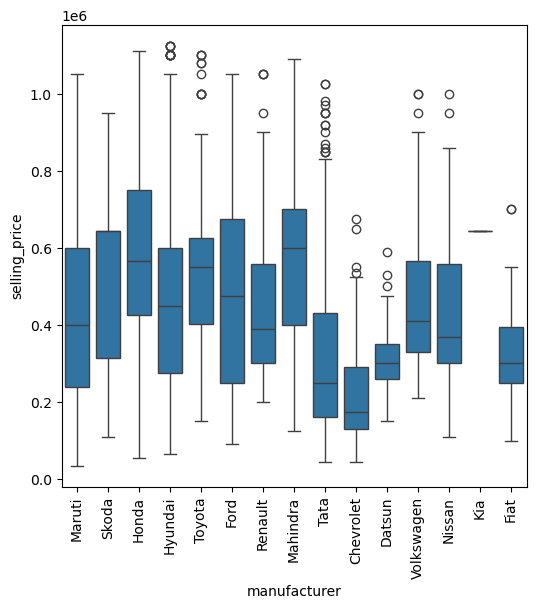

In [82]:
plt.figure(figsize=(6,6))
sns.boxplot(x='manufacturer',y='selling_price',data=df)
plt.xticks(rotation=90)
plt.show()


1. **Price Distribution**:
   - **Maruti, Hyundai,Mahindra and Ford** have the largest interquartile range (IQR), indicating a wide spread in selling prices.
   - **Kia, Datsun, and Fiat** have relatively smaller IQRs, showing less variation in prices.
   
2. **Outliers**:
   - There are visible outliers in almost all brands, especially ** Toyota, Chevrolet, and Tata**, suggesting that certain cars are priced much higher or lower than the rest of the brand's typical range.
   - **Fiat** has only one clear outlier, but its overall price range is relatively smaller.
   
3. **Central Tendency**:
   - **Honda, Hyundai,Mahindra and Ford** have their median (the line inside the box) selling price above the 0.5 mark, indicating that half of their cars sell at relatively higher prices.
   - **Datsun, Chevrolet, Renault**, and **Fiat** show medians below 0.5, indicating generally lower selling prices.
   




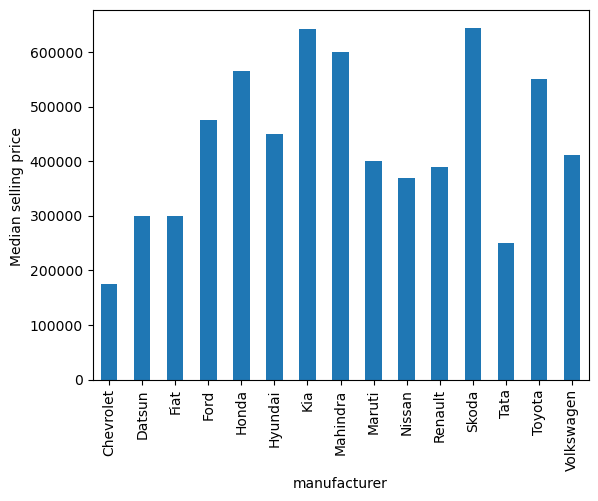

In [83]:
df.groupby('manufacturer')['selling_price'].median().plot(kind='bar')
plt.ylabel('Median selling price ')
plt.show()


- Mahindra has the highest median selling price.
- Chevrolet has the lowest median selling price.

# selling_price & fuel .

- **Insights**
- Diesel cars have the highest average selling price.
- LPG cars have the lowest averege selling price.

In [84]:
stats_summary = df.groupby('fuel')['selling_price'].describe()
stats_summary

,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
CNG,45.0,318244.377778,105882.177290,120000.0,211000.0,330000.0,399000.0,545000.0
Diesel,2653.0,504242.298153,234518.571072,45000.0,310000.0,490000.0,675000.0,1125000.0
LPG,34.0,208264.705882,79485.203054,54000.0,150000.0,200000.0,275000.0,375000.0
Petrol,3145.0,390085.390779,208363.307915,35000.0,225000.0,350000.0,550000.0,1125000.0


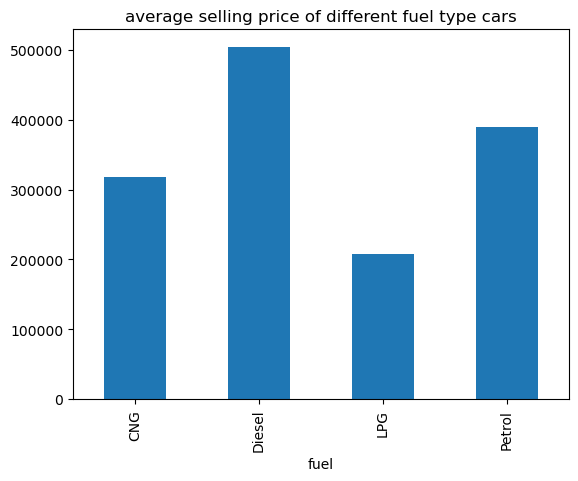

In [85]:
df.groupby('fuel')['selling_price'].mean().plot(kind='bar')
plt.title('average selling price of different fuel type cars')
plt.show()

- Diesel cars has the highest average selling price.
- LPG cars has the lowest averege selling price.

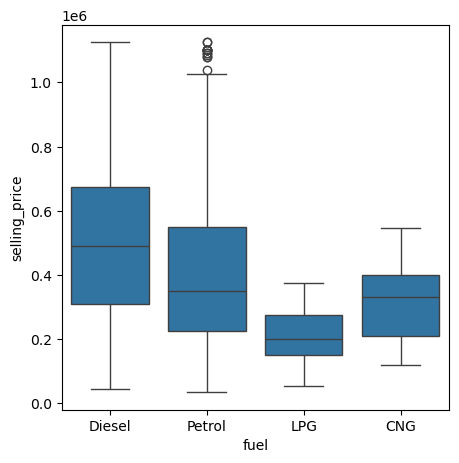

In [86]:
plt.figure(figsize=(5,5))
sns.boxplot(x='fuel',y='selling_price',data=df)
plt.show()

- **Diesel** cars have the highest median and widest price range.
- **Petrol** cars also show a wide range, with several high-price outliers.
- **CNG** cars have a moderate range with a median higher than **LPG**.
- **LPG** cars have the lowest and most consistent prices.

# Selling_price & seller_type.

- **Insights**
- If the car was sold by Trustmark Dealer, the average selling price was higher than others. If the car was sold individually, the average selling price was lower.

In [87]:
stats_summary = df.groupby('seller_type')['selling_price'].describe()
stats_summary

,count,mean,std,min,25%,50%,75%,max
seller_type,,,,,,,,
Dealer,685.0,559097.759124,209138.728412,88000.0,425000.0,560000.0,695000.0,1125000.0
Individual,5020.0,418756.853187,224176.843963,35000.0,240000.0,380000.0,580000.0,1125000.0
Trustmark Dealer,172.0,586244.186047,195347.938862,225000.0,550000.0,625000.0,650000.0,1000000.0


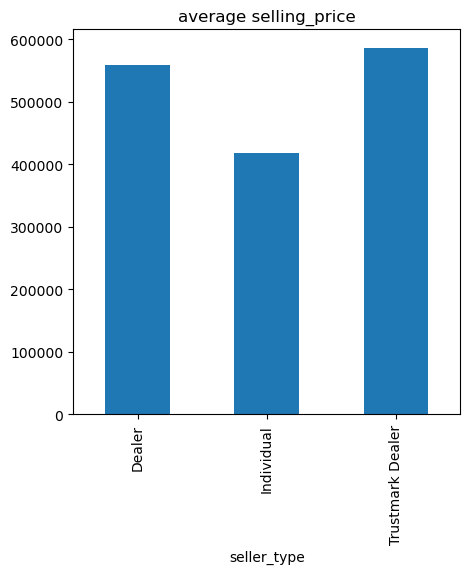

In [88]:
plt.figure(figsize=(5,5))
df.groupby('seller_type')['selling_price'].mean().plot(kind='bar')
plt.title('average selling_price')
plt.show()

- If the car was sold by a Trustmark dealer, the average selling price was higher than others. If the car was sold by an individual, the average selling price was lower.

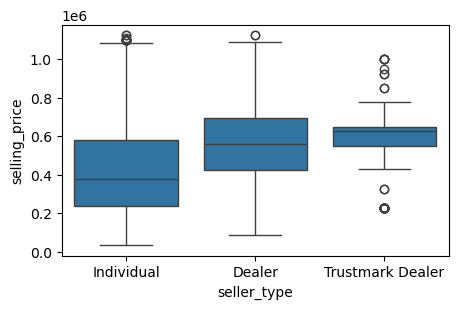

In [89]:
plt.figure(figsize=(5,3))
sns.boxplot(x='seller_type',y='selling_price',data=df)
plt.show()

- **Trustmark Dealers** have the highest and most consistent selling prices.
- **Individual** sellers have the lowest median price with higher variability and outliers.
- **Dealers** show moderate pricing between the two.

In [90]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value,manufacturer,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,190.0,2000.0,Maruti,Swift Dzire VDI


# selling_price & transmission

- **Insights**
-  Automatic cars have the highest average selling price.

In [91]:
stats_summary = df.groupby('transmission')['selling_price'].describe()
stats_summary
# most of the cars are manual.

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
Automatic,435.0,631878.142529,194051.792546,75000.0,525000.0,645000.0,750000.0,1125000.0
Manual,5442.0,424679.966189,223050.833908,35000.0,246000.0,391500.0,585000.0,1125000.0


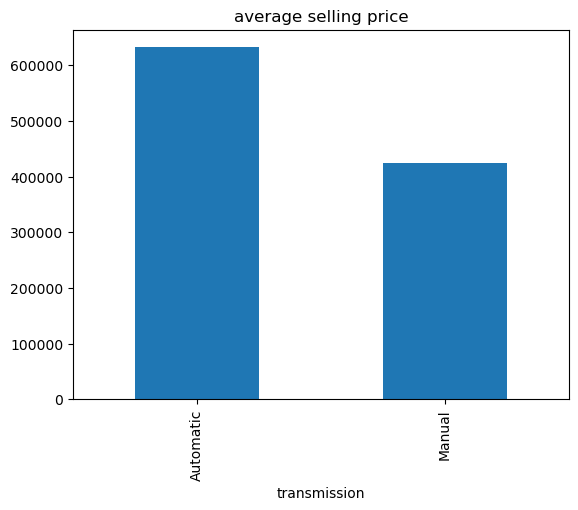

In [92]:
df.groupby('transmission')['selling_price'].mean().plot(kind='bar')
plt.title('average selling price')
plt.show()
                                                    

- Automatic cars has the highest average selling price.

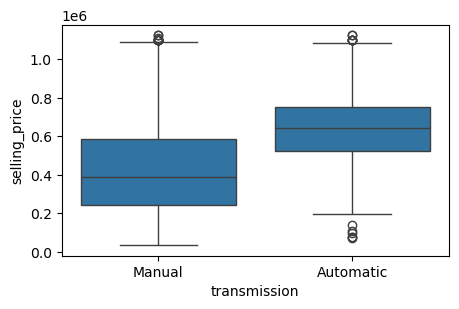

In [93]:
plt.figure(figsize=(5,3))
sns.boxplot(x='transmission',y='selling_price',data=df)
plt.show()

The box plot shows that automatic cars have a higher average selling price than manual cars. There is also a slightly larger range of selling prices for manual cars.


# selling_price & owner.

- **Insights**
- most of the cars are first owner cars.
-  first owner vehicle is the highest selling price or Fourth & above owner cars have the lowest selling price.

In [94]:
stats_summary = df.groupby('owner')['selling_price'].describe()
stats_summary
# most of the cars are first owner cars.

,count,mean,std,min,25%,50%,75%,max
owner,,,,,,,,
First Owner,3956.0,503947.139282,221980.530827,35000.0,320000.0,500000.0,650000.0,1125000.0
Fourth & Above Owner,95.0,226752.578947,139208.080530,40000.0,125000.0,185000.0,315000.0,700000.0
Second Owner,1461.0,325973.530459,180796.674741,45000.0,187000.0,300000.0,430000.0,1125000.0
Third Owner,365.0,259100.443836,152519.878248,50000.0,150000.0,220000.0,340000.0,850000.0


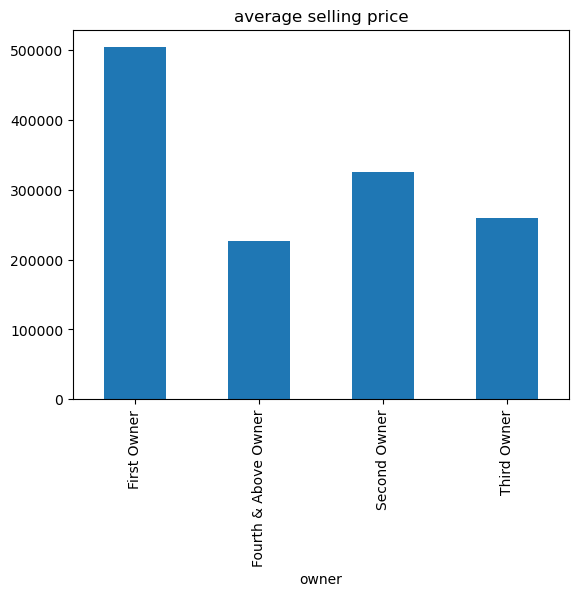

In [95]:
df.groupby('owner')['selling_price'].mean().plot(kind='bar')
plt.title('average selling price')
plt.show()

- first owner vehicle is the highest selling price or Fourth & above owner cars have the lowest selling price.

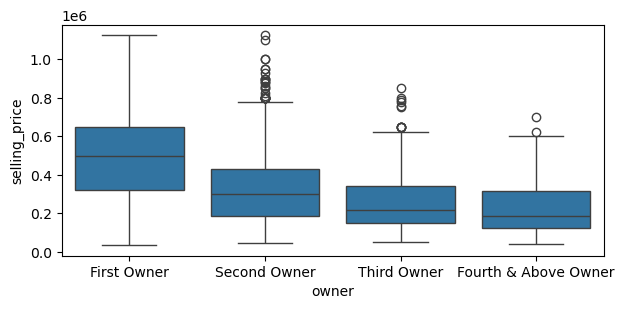

In [96]:
plt.figure(figsize=(7,3))
sns.boxplot(x='owner',y='selling_price',data=df)
plt.show()

The box plot shows that first owner vehicles have the highest selling price, while fourth and above owner cars have the lowest selling price. The median selling price decreases as the number of owners increases.


In [97]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value,manufacturer,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,190.0,2000.0,Maruti,Swift Dzire VDI


# Bivariate analysis on numerical features.

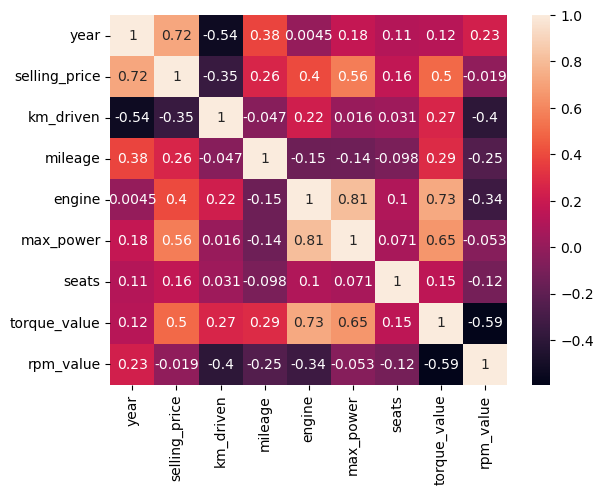

In [98]:
numerical_features = df[['year','selling_price','km_driven','mileage','engine','max_power','seats','torque_value','rpm_value']]
correlation = numerical_features.corr()
sns.heatmap(correlation,annot=True)
plt.show()

- Selling price is positively correlated with engine,mileage,year,seats,torque_value and max power, meaning cars with larger engines and more power tend to have higher selling prices.
- Selling price is negatively correlated with km_driven, and rpm_value, indicating that cars with higher Km_driven and lower rpm values are generally cheaper.

In [99]:
df= df.drop("name",axis=1)


In [100]:
df.head(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value,manufacturer,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.000000,2000.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.000000,2000.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,124.544455,700.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.668960,2250.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.776475,500.0,Maruti,Swift VXI BSIII


# convert categorical features into binary .

- nominal_feature = manufacturer , model , transmission , seller_type , fuel 
  
- ordinal_feature = owner

# Ordinal encoding in owner feature.

In [101]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)

In [102]:
from category_encoders import OrdinalEncoder

owner_order = ['First Owner', 'Second Owner', 'Third Owner','Fourth & Above Owner']

owner_encoder = OrdinalEncoder(cols=['owner'],mapping=[{'col': 'owner' , 'mapping':dict(zip(owner_order,range(len(owner_order))))}])

df['owner_encoded'] = owner_encoder.fit_transform(df['owner'])

# On-hot encoding in nominal.

In [103]:
manufacturer_count = df['manufacturer'].value_counts()
manufacturer_count

manufacturer
Maruti        2204
Hyundai       1274
Tata           497
Honda          427
Ford           354
Renault        218
Mahindra       176
Chevrolet      170
Volkswagen     165
Toyota         122
Skoda           88
Nissan          78
Datsun          65
Fiat            38
Kia              1
Name: count, dtype: int64

In [104]:
# create new categories in a manufacturere features.
thershold = 100

others_manufacturer = manufacturer_count[manufacturer_count <  thershold].index.tolist()

# Replace rare categories with others
df['manufacturer'] = df['manufacturer'].apply(lambda x : 'others' if x in others_manufacturer else x)



In [105]:
df['manufacturer'].value_counts()

manufacturer
Maruti        2204
Hyundai       1274
Tata           497
Honda          427
Ford           354
others         270
Renault        218
Mahindra       176
Chevrolet      170
Volkswagen     165
Toyota         122
Name: count, dtype: int64

In [106]:
model_count = df['model'].value_counts()
model_count

model
Swift Dzire VDI                      129
Alto 800 LXI                          82
Alto LXi                              71
Swift VDI                             59
Alto K10 VXI                          50
                                    ... 
Elite i20 Petrol Magna Exective        1
Avventura MULTIJET Emotion             1
EcoSport 1.5 Diesel Ambiente BSIV      1
KUV 100 G80 K6 Plus                    1
City 1.5 V MT Sunroof                  1
Name: count, Length: 1394, dtype: int64

In [107]:
thershold = 50

other_models = model_count[model_count < thershold ].index.tolist()

df['model'] = df['model'].apply(lambda x : 'others' if x in other_models else x)





In [108]:
df = df.drop('owner',axis=1)

In [109]:
df['model'].value_counts()

model
others             5486
Swift Dzire VDI     129
Alto 800 LXI         82
Alto LXi             71
Swift VDI            59
Alto K10 VXI         50
Name: count, dtype: int64

In [110]:
print(df.shape)

(5877, 15)


In [111]:
print(df['manufacturer'].shape)

(5877,)


In [112]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,torque_value,rpm_value,manufacturer,model,owner_encoded
0,2014,450000,145500,Diesel,Individual,Manual,23.40,1248.0,74.00,5.0,190.000000,2000.0,Maruti,Swift Dzire VDI,0
1,2014,370000,120000,Diesel,Individual,Manual,21.14,1498.0,103.52,5.0,250.000000,2000.0,others,others,1
2,2006,158000,140000,Petrol,Individual,Manual,17.70,1497.0,78.00,5.0,124.544455,700.0,Honda,others,2
3,2010,225000,127000,Diesel,Individual,Manual,23.00,1396.0,90.00,5.0,219.668960,2250.0,Hyundai,others,0
4,2007,130000,120000,Petrol,Individual,Manual,16.10,1298.0,88.20,5.0,112.776475,500.0,Maruti,others,0


In [113]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [114]:
df.shape

(5877, 15)

In [115]:
# One-hot encode all categorical features
df = pd.get_dummies(df, columns=['manufacturer', 'model', 'fuel','transmission','seller_type'],dtype=np.int32)

print(df)

      year  selling_price  km_driven  mileage  engine  max_power  seats  \
0     2014         450000     145500    23.40  1248.0      74.00    5.0   
1     2014         370000     120000    21.14  1498.0     103.52    5.0   
2     2006         158000     140000    17.70  1497.0      78.00    5.0   
3     2010         225000     127000    23.00  1396.0      90.00    5.0   
4     2007         130000     120000    16.10  1298.0      88.20    5.0   
...    ...            ...        ...      ...     ...        ...    ...   
8123  2013         320000     110000    18.50  1197.0      82.85    5.0   
8124  2007         135000     119000    16.80  1493.0     110.00    5.0   
8125  2009         382000     120000    19.30  1248.0      73.90    5.0   
8126  2013         290000      25000    23.57  1396.0      70.00    5.0   
8127  2013         290000      25000    23.57  1396.0      70.00    5.0   

      torque_value  rpm_value  owner_encoded  ...  model_others  fuel_CNG  \
0       190.000000    

In [116]:
df.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_value,rpm_value,owner_encoded,...,model_others,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,2014,450000,145500,23.40,1248.0,74.00,5.0,190.000000,2000.0,0,...,0,0,1,0,0,0,1,0,1,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,250.000000,2000.0,1,...,1,0,1,0,0,0,1,0,1,0
2,2006,158000,140000,17.70,1497.0,78.00,5.0,124.544455,700.0,2,...,1,0,0,0,1,0,1,0,1,0
3,2010,225000,127000,23.00,1396.0,90.00,5.0,219.668960,2250.0,0,...,1,0,1,0,0,0,1,0,1,0
4,2007,130000,120000,16.10,1298.0,88.20,5.0,112.776475,500.0,0,...,1,0,0,0,1,0,1,0,1,0


# Model Building

In [117]:
X = df.drop('selling_price',axis=1)
y = df['selling_price']

In [118]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [119]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X_train,y_train)

LinearRegression()

In [120]:
y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

In [121]:
# Evaluate the model.

from sklearn.metrics import mean_squared_error, r2_score



In [122]:
# RMSE
rmse_train =np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test ))

# R²
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [123]:
print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)
print("R² (Train):", r2_train)
print("R² (Test):", r2_test)

RMSE (Train): 99303.50047198325
RMSE (Test): 100236.56744426723
R² (Train): 0.8061072358278584
R² (Test): 0.8135233954740496


# OLS model.

In [124]:
import statsmodels.api as sm
x_train =  sm.add_constant(X_train)
model_2 = sm.OLS(y_train,X_train).fit()



In [125]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     565.7
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:01:57   Log-Likelihood:                -53160.
No. Observations:                4113   AIC:                         1.064e+05
Df Residuals:                    4082   BIC:                         1.066e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
year            



### 1. **Model Fit:**
   - **R-squared:** 0.806, indicating that 80.6% of the variance in the `selling_price` is explained by the model. This suggests a good fit.
   - **Adjusted R-squared:** 0.805, slightly lower than R-squared but still strong, indicating the model generalizes well even when accounting for the number of predictors.
   - **F-statistic (565.7, p-value = 0.00):** Indicates that the overall regression model is statistically significant.

### 2. **Significant Predictors:**
   The following predictors have p-values < 0.05, making them statistically significant:
   - **Year (coef: 3.801e+04):** A positive coefficient indicates that newer cars are priced higher.
   - **km_driven (coef: -0.751):** A negative coefficient shows that cars with higher mileage tend to have lower prices.
   - **Mileage (coef: -4353.69):** Worse fuel efficiency leads to lower prices.
   - **Max_power (coef: 3365.93):** Higher horsepower positively affects the price.
   - **Seats (coef: 1.985e+04):** More seats are associated with higher prices.
   - **Torque (coef: 947.68) and RPM (coef: -6.78):** Higher torque increases price, while higher RPM reduces it.
   - **Fuel types:** All types (CNG, Diesel, LPG, Petrol) show a strong negative effect on price compared to the baseline category.
   - **Transmission (Automatic and Manual):** Both have large negative effects, with automatic transmission models being priced lower.
   - **Seller_type (Dealer, Individual, Trustmark Dealer):** All seller types have large negative effects on the price.

### 3. **Non-Significant Predictors:**
   - **Engine (coef: 9.46, p-value = 0.613):** The engine size does not seem to have a statistically significant effect on price.
   
### 4. **Multicollinearity:**
   - The condition number is very high (Cond. No. = 1.16e+16), which suggests severe multicollinearity. This means some predictors may be highly correlated, and it could affect the stability of the coefficient estimates.
   - The smallest eigenvalue (1.6e-19) is also very small, supporting the multicollinearity concern.

### 5. **Normality of Residuals:**
   - **Omnibus (137.833) and Jarque-Bera (178.597):** Both tests suggest that the residuals are not normally distributed (p-value = 1.65e-39), though this may not be critical depending on the goal of the model.

### 6. **Possible Interpretation Issues:**
   - **Multicollinearity:** This is a serious issue in your model, as indicated by the condition number. You might consider removing or combining highly correlated features or using regularization techniques like Ridge or Lasso regression to mitigate this problem.


### Recommendations:
   - Investigate multicollinearity by examining variance inflation factors (VIF).
   - Consider reducing the number of categorical variables with numerous levels (e.g., manufacturers and models) to avoid overfitting.
   - Explore transforming variables or using regularization to address multicollinearity.

This analysis highlights the model's strengths and areas for improvement, particularly regarding multicollinearity and potential overfitting due to the number of categorical variables.

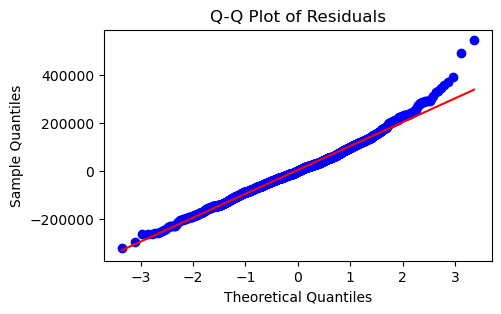

In [128]:
import scipy.stats as stats
# Assuming you have residuals calculated as y_test - y_pred
residuals = y_test - y_pred_test

# Q-Q plot
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

- shows slighttly right skweed distribution of residuals.

# Apply Regularization.

# Ridge.

In [129]:
from sklearn.linear_model import Lasso, Ridge

In [130]:
model_3 = Ridge(alpha=1)
model_3.fit(X_train,y_train)

Ridge(alpha=1)

In [131]:
y_pred_train = model_3.predict(X_train)
y_pred_test = model_3.predict(X_test)

In [132]:
# RMSE
rmse_train1 =np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_pred_test ))

# R²
r2_train1 = r2_score(y_train, y_pred_train)
r2_test1 = r2_score(y_test, y_pred_test)

In [133]:
print("RMSE (Train):", rmse_train1)
print("RMSE (Test):", rmse_test1)
print("R² (Train):", r2_train1)
print("R² (Test):", r2_test1)

RMSE (Train): 99304.79739479265
RMSE (Test): 100227.68112952712
R² (Train): 0.806102171241226
R² (Test): 0.8135564575867774


# Lasso

In [134]:
model_4 = Lasso(alpha=1)
model_4.fit(X_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.348e+12, tolerance: 2.092e+10
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [135]:
y_pred_train = model_4.predict(X_train)
y_pred_test = model_4.predict(X_test)

In [136]:
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test ))

# R²
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [137]:
print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)
print("R² (Train):", r2_train)
print("R² (Test):", r2_test)

RMSE (Train): 99303.50601072022
RMSE (Test): 100236.18885939654
R² (Train): 0.8061072141987911
R² (Test): 0.813524804083496


# Random Forest 

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Create a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate and print RMSE
Rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {Rmse_rf}")

# Calculate and print R²
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R²: {r2_rf}")



Random Forest RMSE: 68305.98133448976
Random Forest R²: 0.913405671087173


# SVM.

In [146]:
from sklearn.svm import SVR

# Create an SVR model with RBF kernel
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Calculate and print RMSE
Rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f"SVR RMSE: {Rmse_svr}")

# Calculate and print R²
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR R²: {r2_svr}")


SVR RMSE: 236493.14374187772
SVR R²: -0.03802805057881109


# Comarison on RMSE.

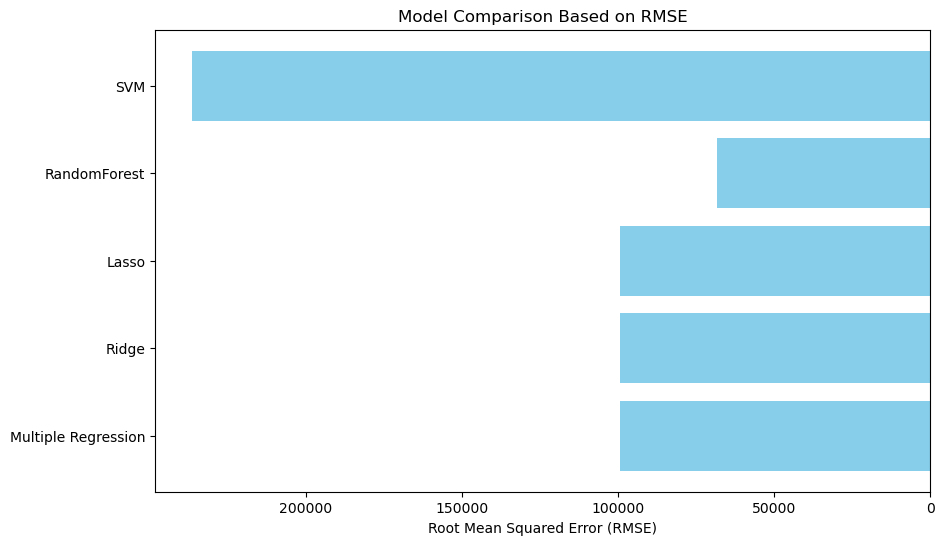

In [144]:


# Suppose these are the RMSE values for different models
models = ['Multiple Regression', 'Ridge','Lasso' , 'RandomForest','SVM']
Rmse_values = [99303.50,99304.79,99303.50,68305.98,236493.14]

# Create a bar plot for MSE values
plt.figure(figsize=(10, 6))
plt.barh(models, Rmse_values, color='skyblue')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison Based on RMSE')
plt.gca().invert_xaxis()  # Invert y-axis for better readability
plt.show()



- **RandomForest** is the best model in this comparison, with the lowest RMSE, indicating its strong performance for this dataset. It's a great choice for predictive tasks.

- **SVM** performed the worst and should be avoided or further tuned for this particular dataset.
  
- The performance of Multiple Regression, Ridge, and Lasso is relatively similar but not as good as RandomForest.

# Comarision on R-sqaured

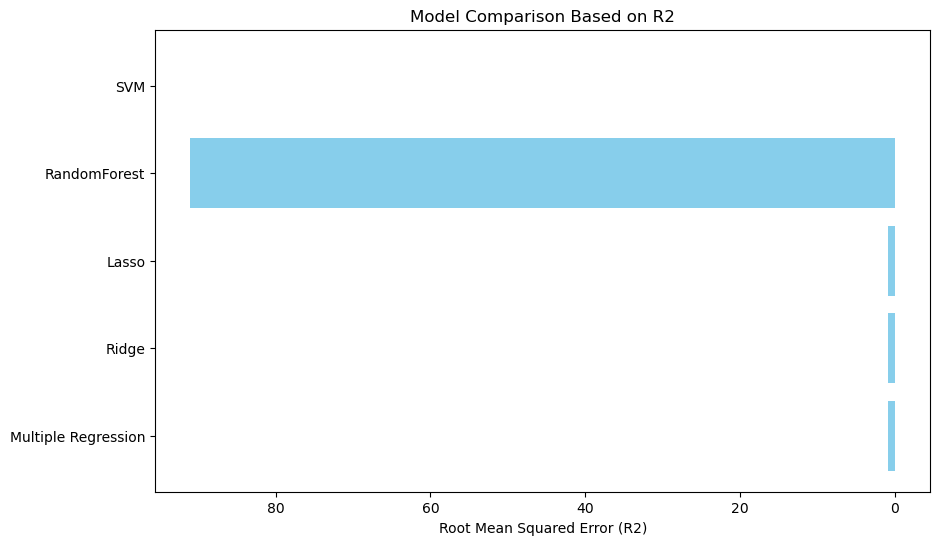

In [147]:

# Suppose these are the RMSE values for different models
models = ['Multiple Regression', 'Ridge','Lasso' , 'RandomForest','SVM']
R2_values = [0.81,0.81,0.81,91,-0.03]

# Create a bar plot for MSE values
plt.figure(figsize=(10, 6))
plt.barh(models, R2_values, color='skyblue')
plt.xlabel('Root Mean Squared Error (R2)')
plt.title('Model Comparison Based on R2')
plt.gca().invert_xaxis()  # Invert y-axis for better readability
plt.show()


**Key Conclusions:**

- RandomForest is by far the best model in terms of performance, with the highest R², meaning it captures most of the variability in the target variable.
- Lasso, Ridge, and Multiple Regression perform similarly but are not as effective at explaining the target variable's variance.
- SVM seems to perform the worst, possibly even worse than a simple average prediction, meaning it's not suitable for this dataset without further tuning.


# ### Conclusion:
- **RandomForest** is the best model for predicting selling price based on both RMSE and R² values.
- **RMSE of 68,305.98** indicates that predictions are, on average, off by around 68,306 units.
- **R² of 0.9134** shows that the model explains 91.34% of the variance in selling price, meaning it captures most of the important patterns.
- Overall, RandomForest is both accurate and reliable for this task.